In [1]:
import sys
sys.path.append("/home/ross/CytoPy")

In [2]:
from CytoPy.data.project import Project
from CytoPy.data.setup import global_init
from CytoPy.flow.clustering import *
global_init("Peritonitis")

In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import logging
sns.set(style="white", font_scale=1.3)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [55]:
project = Project.objects(project_id="Immunofingerprints").get()
project.list_experiments()

['Drain fluid T cells',
 'Drain fluid Leukocytes',
 'Corrected drain fluid T cells',
 'Corrected drain fluid Leukocytes']

<h1>Update subject meta-data</h1>

In [18]:
exp = project.load_experiment('Corrected drain fluid T cells')
for f in exp.fcs_files:
    if f.primary_id == "Training Data":
        continue
    subject = Subject.objects(subject_id=f.primary_id.replace("Corrected_", "")).get()
    subject.files.append(f)
    subject.save()

In [19]:
exp = project.load_experiment('Corrected drain fluid Leukocytes')
for f in exp.fcs_files:
    if f.primary_id == "Training Data":
        continue
    subject = Subject.objects(subject_id=f.primary_id.replace("Corrected_", "")).get()
    subject.files.append(f)
    subject.save()

<h1>Clustering T cells</h1>

In [32]:
exp = project.load_experiment('Corrected drain fluid T cells')

<h2>FlowSOM</h2>

In [6]:
features = exp.panel.list_markers()

In [7]:
from warnings import filterwarnings
filterwarnings("ignore")
clustering = Clustering(experiment=exp,
                        features=features,
                        sample_ids=[x for x in exp.list_samples() if x != "Training Data"],
                        root_population="root",
                        transform="logicle",
                        verbose=True,
                        population_prefix="FlowSOM")

Loading single cell data...


  0%|          | 0/44 [00:00<?, ?it/s]

Ready to cluster!


<h3>Clustering</h3>

In [8]:
clustering.cluster(flowsom_clustering,
                   meta_cluster_class=AgglomerativeClustering(),
                   meta_cluster_kwargs={"min_n": 10, "max_n": 30},
                   training_kwargs={"som_dim": (25, 25),
                                    "sigma": 1,
                                    "learning_rate": 0.1,
                                    "batch_size": 1000,
                                    "weight_init": "random"},
                   print_performance_metrics=False)

----- Clustering Corrected_165-09 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.16653074236034443

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/512 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_175-09 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21475213144866603

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_209-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.16956271493212677

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_237-06 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2087507959448388

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/4205 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_239-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.23468582918609637

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_239-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.19235374833845562

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_251-07 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2169768934402694

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_251-08 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21061439956393624

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_254-04 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.221028059224237

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/1913 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_254-05 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.21943956237993562

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_255-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.24771665015408353

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_255-05 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21633984371551274

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_264-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22522051146166158

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_267-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22291865717808346

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_267-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2522457914243553

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_273-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1676318612899639

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/611 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_276-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.20435251973358534

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/4851 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_279-03 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2423181290723009

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.20738633027235495

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.19968651679666227

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21234478694021014

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_288-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21760841923012922

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_294-02 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.20060110207931225

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/5468 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_294-03 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.23882801951607213

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/4159 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_298-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.24184983036010663

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_302-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21005291158024758

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/2511 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.21563101200399937

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22850889747096562

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21110578081812983

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_306-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.20823726087491662

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/3859 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_307-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.2163024291269565

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_308-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21219910039083906

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_308-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22642346072399583

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_308-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2044145193910198

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_310-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2141092818978033

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_315-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22165904082704224

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_315-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22806810947637268

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_316-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2213239794263948

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_318-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.15784838713948038

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_320-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.19971271873128454

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_322-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2069120338231822

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/8530 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_323-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22488905136639403

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/4562 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_324-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.20202737631406323

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_326-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21051551550485761

Training complete!
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------




<h3>Meta-clustering</h3>

In [9]:
clustering.meta_cluster(consensus_metacluster,
                        summary_method="median",
                        cluster_class=KMeans(),
                        scale_method=None,
                        smallest_cluster_n=8,
                        largest_cluster_n=20,
                        n_resamples=100)

----- Consensus meta-clustering ------


  0%|          | 0/12 [00:00<?, ?it/s]

Clustering performance...
Silhouette coefficient: 0.3544820293926983
Calinski-Harabasz index: 240.46790792116028
Davies-Bouldin index: 0.9451572629049009


<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

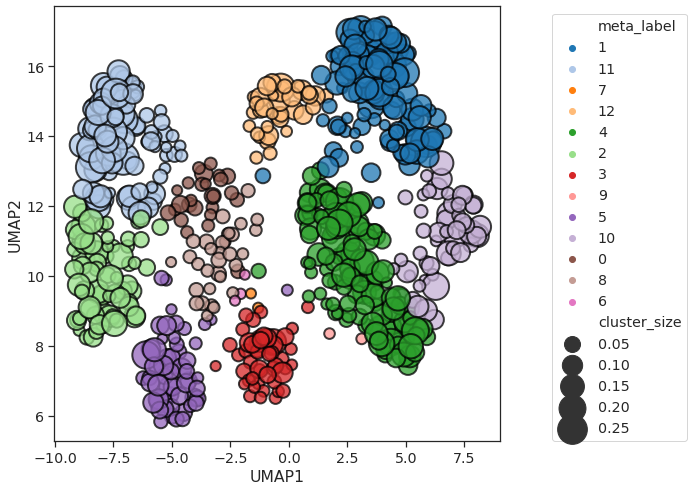

In [10]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})

In [11]:
clustering.data["subject"] = clustering.data["sample_id"].apply(lambda x: x.replace("Corrected_", ""))

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

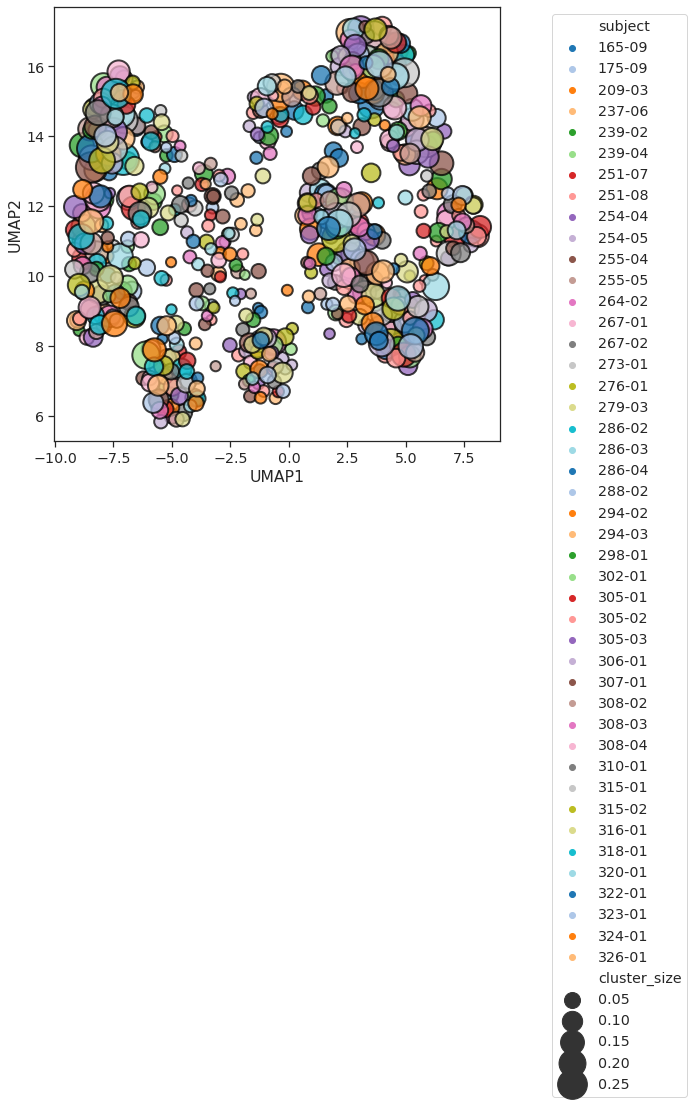

In [12]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100,
                                                    "min_dist": 1},
                              colour_label="subject")

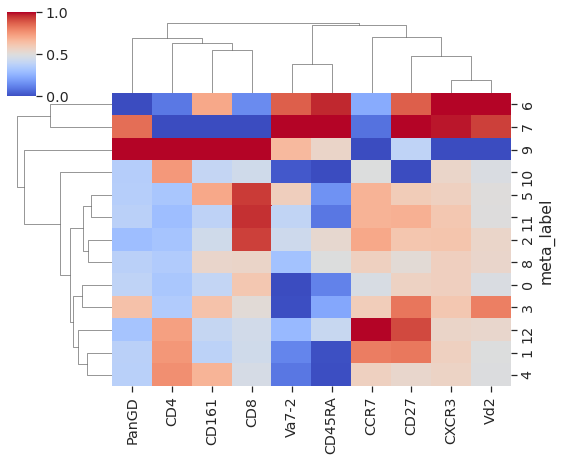

In [13]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [19]:
# Clusters 9, 6 & 7 are suspect
for suspect in [9, 6, 7]:
    print(f"Cluster {suspect}:")
    x = clustering.data[clustering.data.meta_label == suspect]
    print(f'...contains {x.shape[0]} cells')
    print(f'...represents {x.subject_id.nunique()} subjects')

Cluster 9:
...contains 12 cells
...represents 2 subjects
Cluster 6:
...contains 12 cells
...represents 3 subjects
Cluster 7:
...contains 15 cells
...represents 2 subjects


In [21]:
clustering.data = clustering.data[~clustering.data.meta_label.isin([9, 6, 7])]

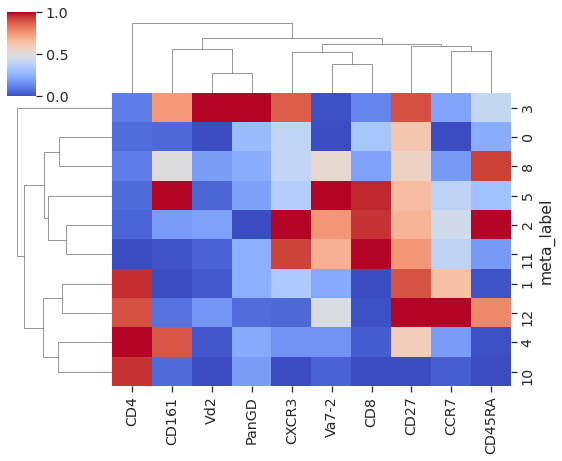

In [22]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [24]:
clustering.rename_meta_clusters({3: "Vd2+ GDTs",
                                 0: "CD4- CD8- T cells",
                                 8: "MAIT cells",
                                 5: "MAIT cells",
                                 2: "CD8+ T cells (1)",
                                 11: "CD8+ T cells (2)",
                                 1: "CD4+ T cells (1)",
                                 12: "CD4+ T cells (2)",
                                 4:"CD4+ T cells (3)",
                                 10: "CD4+ T cells (4)"})

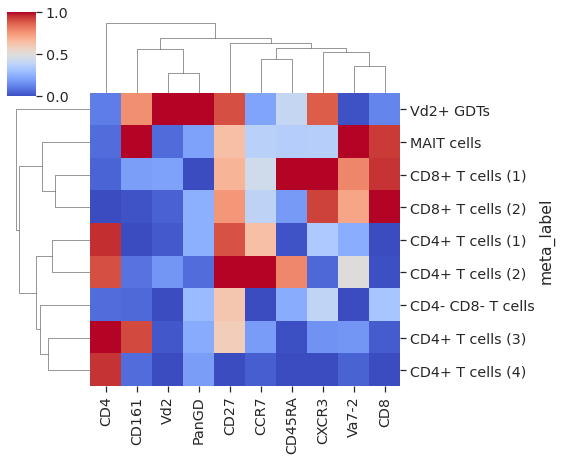

In [25]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)
plt.savefig("figures/flowsom_tcells_heatmap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

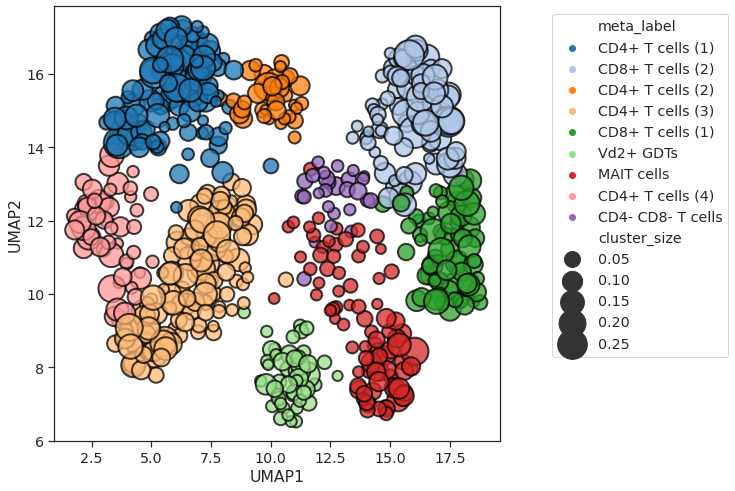

In [26]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})
plt.savefig("figures/flowsom_tcells_umap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

In [33]:
clustering.save()

  0%|          | 0/44 [00:00<?, ?it/s]

<h3>Peritonitis vs Stable</h3>

In [27]:
clustering.load_meta_variable(variable="status")

  0%|          | 0/44 [00:00<?, ?it/s]

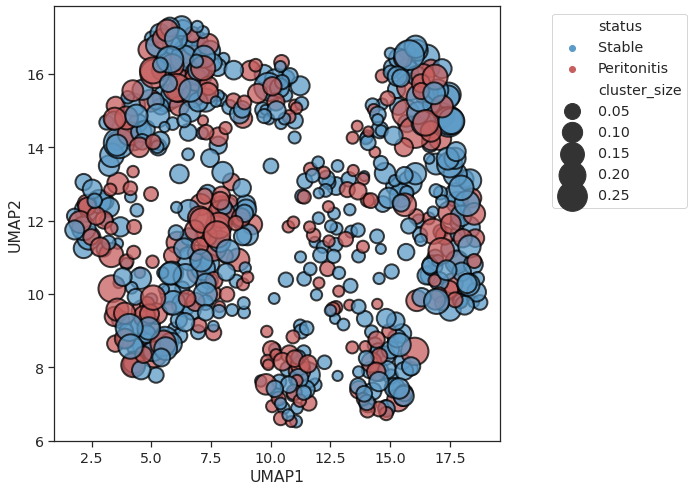

In [29]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100,
                                                    "min_dist": 1},
                              colour_label="status",
                              cmap=["#5d9bc7", "#c75f5f"])
plt.savefig("figures/flowsom_tcells_umap_status.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

<h2>Phenograph</h2>

In [38]:
features = exp.panel.list_markers()

In [39]:
from warnings import filterwarnings
filterwarnings("ignore")
clustering = Clustering(experiment=exp,
                        features=features,
                        sample_ids=[x for x in exp.list_samples() if x != "Training Data"],
                        root_population="root",
                        transform="logicle",
                        verbose=True,
                        population_prefix="Phenograph")

Loading single cell data...


  0%|          | 0/44 [00:00<?, ?it/s]

Ready to cluster!


<h3>Clustering</h3>

In [40]:
clustering.cluster(phenograph_clustering,
                   print_performance_metrics=False)

----- Clustering Corrected_165-09 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.011008977890014648 seconds
Jaccard graph constructed in 0.11397266387939453 seconds
Wrote graph to binary file in 0.007035732269287109 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.600735
After 4 runs, maximum modularity is Q = 0.605535
Louvain completed 24 runs in 0.525209903717041 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.7918689250946045 seconds
-----------------------------


----- Clustering Corrected_175-09 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5300388336181641 seconds
Jaccard graph constructed in 0.7489326000213623 seconds
Wrote graph to binary file in 0.1024010181427002 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.827847
After 8 runs, maximum modularity is

Louvain completed 25 runs in 3.0377426147460938 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.6097633838653564 seconds
-----------------------------


----- Clustering Corrected_267-02 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.711820125579834 seconds
Jaccard graph constructed in 0.5330185890197754 seconds
Wrote graph to binary file in 0.10446429252624512 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.802449
After 7 runs, maximum modularity is Q = 0.804528
After 14 runs, maximum modularity is Q = 0.805543
Louvain completed 34 runs in 4.005042791366577 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.458664655685425 seconds
-----------------------------


----- Clustering Corrected_273-01 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.01131439208984375 seconds
Jaccard 

Neighbors computed in 0.6045145988464355 seconds
Jaccard graph constructed in 0.6981322765350342 seconds
Wrote graph to binary file in 0.1037907600402832 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.802707
After 5 runs, maximum modularity is Q = 0.805536
Louvain completed 25 runs in 3.445765495300293 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.949015140533447 seconds
-----------------------------


----- Clustering Corrected_305-03 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5777707099914551 seconds
Jaccard graph constructed in 0.5197794437408447 seconds
Wrote graph to binary file in 0.1064140796661377 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.820974
Louvain completed 21 runs in 2.8304901123046875 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.130719184875488 seconds
---

-----------------------------


----- Clustering Corrected_323-01 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.17851662635803223 seconds
Jaccard graph constructed in 0.2750203609466553 seconds
Wrote graph to binary file in 0.04775857925415039 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.827507
After 2 runs, maximum modularity is Q = 0.830115
Louvain completed 22 runs in 1.301461935043335 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1.8933677673339844 seconds
-----------------------------


----- Clustering Corrected_324-01 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5069715976715088 seconds
Jaccard graph constructed in 0.5380876064300537 seconds
Wrote graph to binary file in 0.10403251647949219 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.835698
After

<h3>Meta-clustering</h3>

In [41]:
clustering.meta_cluster(phenograph_metaclustering,
                        summary_method="median",
                        k=30)

----- Phenograph meta-clustering ------
...summarising clusters
...clustering the clusters
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.009470701217651367 seconds
Jaccard graph constructed in 0.11008024215698242 seconds
Wrote graph to binary file in 0.008977174758911133 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.884504
Louvain completed 21 runs in 0.4659409523010254 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.6756923198699951 seconds
Clustering performance...
Silhouette coefficient: 0.365960478526458
Calinski-Harabasz index: 285.5889801285775
Davies-Bouldin index: 0.9641992394198006
...assigning meta-labels
------ Complete ------


<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

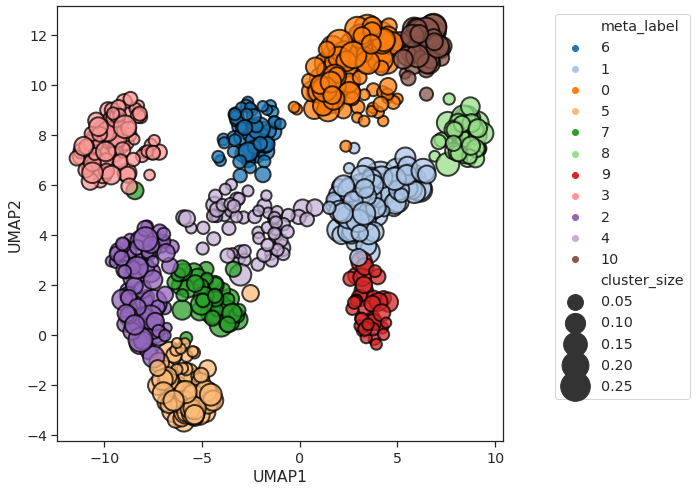

In [42]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})

In [43]:
clustering.data["subject"] = clustering.data["sample_id"].apply(lambda x: x.replace("Corrected_", ""))

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

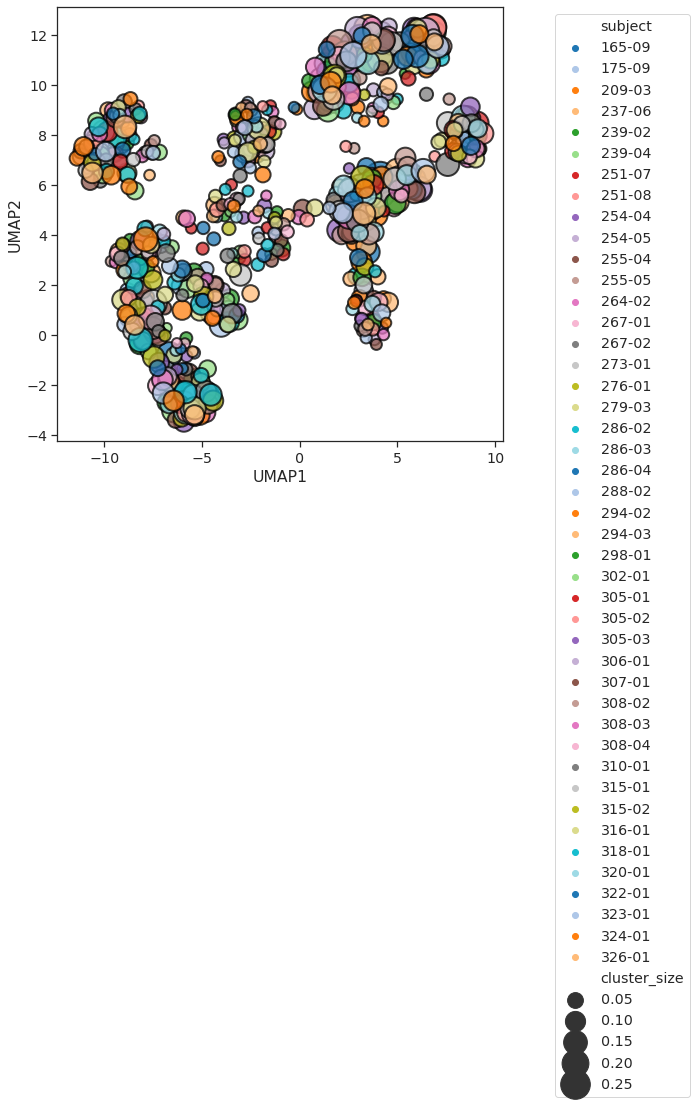

In [44]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1},
                              colour_label="subject")

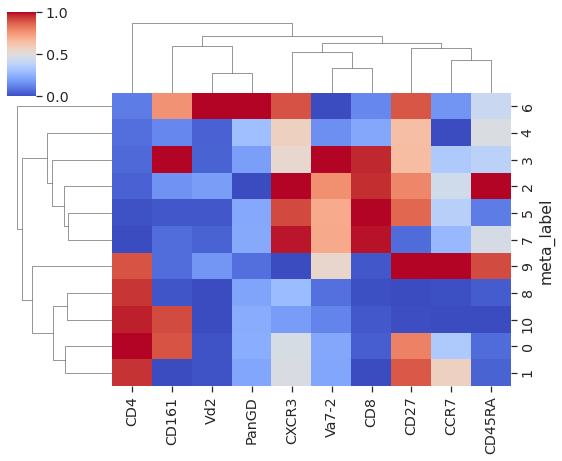

In [45]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [46]:
clustering.rename_meta_clusters({6: "Vd2+ GDTs",
                                 4: "CD4- CD8- T cells",
                                 3: "MAIT cells",
                                 2: "CD8+ T cells (1)",
                                 5: "CD8+ T cells (2)",
                                 7: "CD8+ T cells (3)",
                                 9: "CD4+ T cells (1)",
                                 8: "CD4+ T cells (2)",
                                 10:"CD4+ T cells (3)",
                                 0: "CD4+ T cells (4)",
                                 1: "CD4+ T cells (5)"})

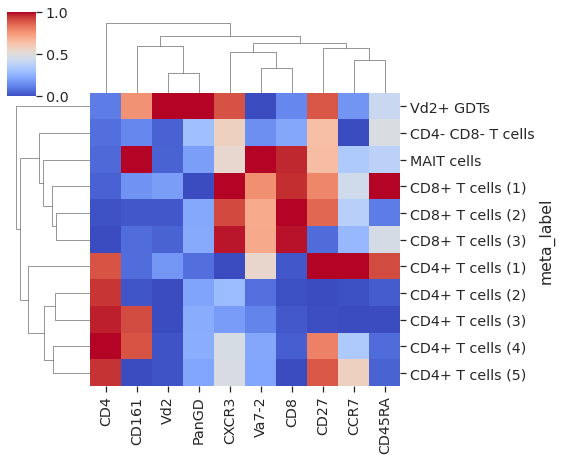

In [47]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)
plt.savefig("figures/phenograph_tcells_heatmap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

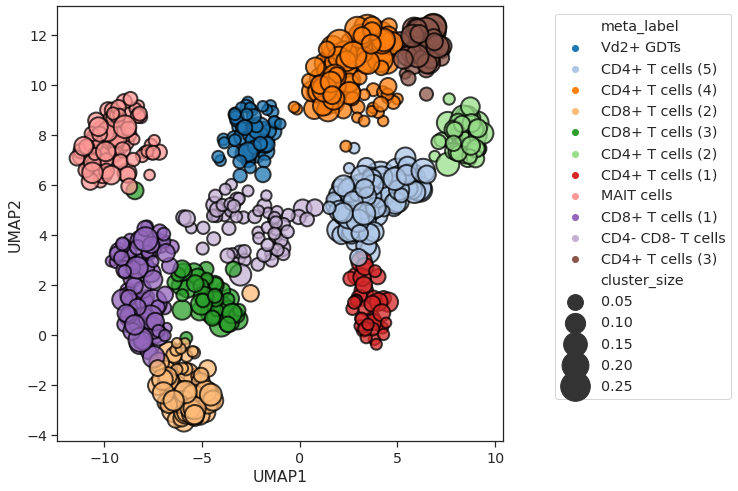

In [48]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})
plt.savefig("figures/phenograph_tcells_umap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

In [49]:
clustering.save()

  0%|          | 0/44 [00:00<?, ?it/s]

<h3>Peritonitis vs Stable</h3>

In [50]:
clustering.load_meta_variable(variable="status")

  0%|          | 0/44 [00:00<?, ?it/s]

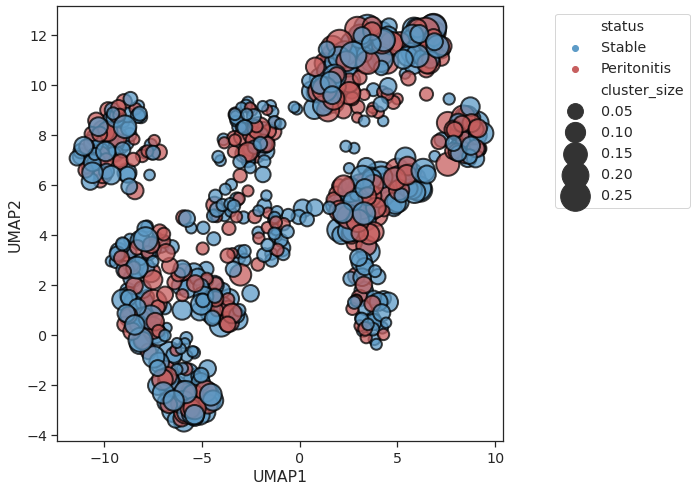

In [52]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100,
                                                    "min_dist": 1},
                              colour_label="status",
                              cmap=["#5d9bc7", "#c75f5f"])
plt.savefig("figures/phenograph_tcells_umap_status.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

<h1>Clustering Leukocytes</h1>

In [56]:
exp = project.load_experiment('Corrected drain fluid Leukocytes')

<h2>FlowSOM</h2>

In [57]:
features = exp.panel.list_markers()

In [58]:
from warnings import filterwarnings
filterwarnings("ignore")
clustering = Clustering(experiment=exp,
                        features=features,
                        sample_ids=[x for x in exp.list_samples() if x != "Training Data"],
                        root_population="root",
                        transform="logicle",
                        transform_kwargs=dict(w=1.0, m=4.0),
                        verbose=True,
                        population_prefix="FlowSOM")

Loading single cell data...


  0%|          | 0/47 [00:00<?, ?it/s]

Ready to cluster!


<h3>Clustering</h3>

In [64]:
clustering.cluster(flowsom_clustering,
                   meta_cluster_class=AgglomerativeClustering(),
                   meta_cluster_kwargs={"min_n": 6, "max_n": 12},
                   training_kwargs={"som_dim": (30, 30),
                                    "sigma": 1,
                                    "learning_rate": 0.1,
                                    "batch_size": 1000,
                                    "weight_init": "random"},
                   print_performance_metrics=False)

----- Clustering Corrected_142-09 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07908967667082893

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_209-05 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.11845203026070367

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/2168 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_210-14 -----
------------- Training SOM -------------


 [  890 / 1000 ]  89% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0612150860475579

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_237-06 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06717913529457933

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_239-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09104210084928492

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_239-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07897216910340894

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_251-07 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.05728038973940472

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_251-08 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.075221156933667

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_254-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06863893841633821

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_254-05 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.1179032955849075

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_255-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.10164334950405784

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_255-05 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.11575119023269452

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_264-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.10481631724370903

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_267-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09786722905918686

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_267-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09606413753401095

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_273-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06472914200826232

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_276-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06662678561997473

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_279-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.0831761219383371

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07675775860972281

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06821869078324563

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-04 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09800452828207175

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_288-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07381971895171317

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_289-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06793872716117526

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_294-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.060329815187928376

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_294-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.10413390738197596

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/45929 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_294-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.1054077508827181

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_298-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.11224620056566464

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_302-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.08487954683736021

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.060485909172483206

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09381855337981436

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.08682592140471261

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_306-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.061461841823024825

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_307-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09685734749876795

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_308-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09417805434499912

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_308-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07909775033969203

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_308-03 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07298903325700387

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_310-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09173333425280863

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_315-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07964380658341108

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_315-02 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.10538746202053333

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_316-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06108570376333395

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_318-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.1012174958474171

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_320-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.06288290510175665

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_321-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.09670028219370921

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_322-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.07464536688819676

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_323-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.08690370373436372

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_324-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.1004980008647785

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_326-01 -----
------------- Training SOM -------------


 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.10041233561265189

Training complete!
----------------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/50000 [00:00<?, ?it/s]

---------------------------------------




<h3>Meta-clustering</h3>

In [86]:
clustering.meta_cluster(consensus_metacluster,
                        summary_method="median",
                        cluster_class=AgglomerativeClustering(linkage="ward"),
                        scale_method=None,
                        smallest_cluster_n=6,
                        largest_cluster_n=12,
                        n_resamples=100)

----- Consensus meta-clustering ------


  0%|          | 0/6 [00:00<?, ?it/s]

Clustering performance...
Silhouette coefficient: 0.41054023235833204
Calinski-Harabasz index: 327.0328321970737
Davies-Bouldin index: 0.8593090445478877


<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

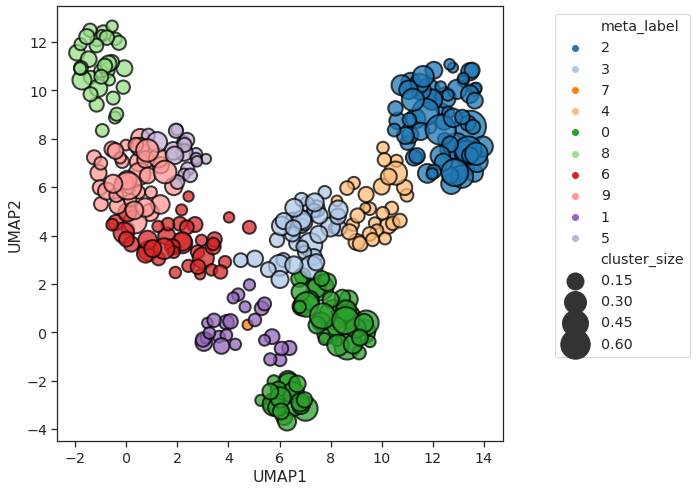

In [87]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})

In [62]:
clustering.data["subject"] = clustering.data["sample_id"].apply(lambda x: x.replace("Corrected_", ""))

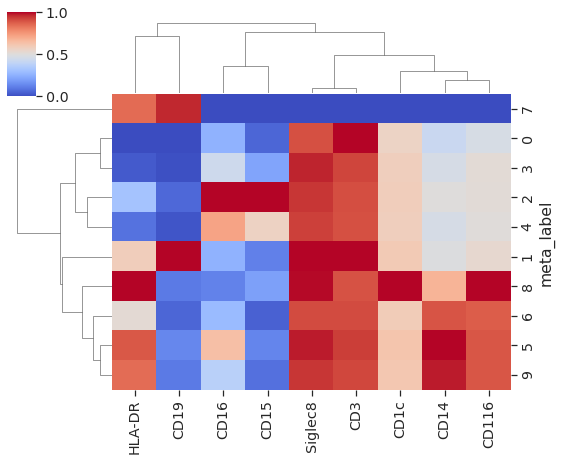

In [88]:
clustering.clustered_heatmap(features=['CD14', 'CD16', 'Siglec8', 'CD3',
                                       'CD1c', 'CD15', 'HLA-DR', 'CD116',
                                       'CD19'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             vmin=0, vmax=1,
                             standard_scale=1,
                             z_score=None,
                             yticklabels=True)

In [91]:
clustering.rename_meta_clusters({7: "B cells",
                                 1: "B cells"})

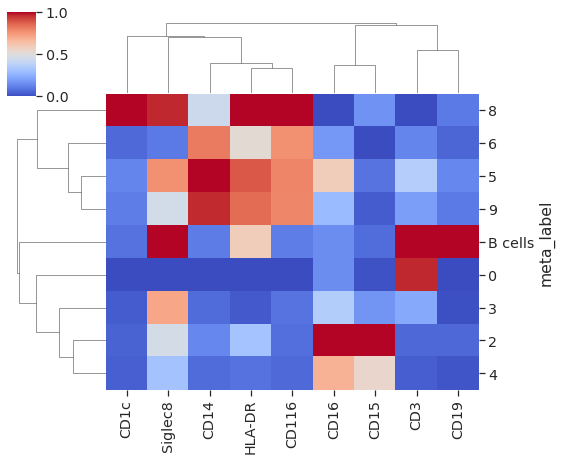

In [92]:
clustering.clustered_heatmap(features=['CD14', 'CD16', 'Siglec8', 'CD3',
                                       'CD1c', 'CD15', 'HLA-DR', 'CD116',
                                       'CD19'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             vmin=0, vmax=1,
                             standard_scale=1,
                             yticklabels=True)

In [93]:
clustering.rename_meta_clusters({8: "DCs",
                                 6: "Monocytes",
                                 5: "Monocytes",
                                 9: "Monocytes",
                                 0: "T cells",
                                 3: "Eosinophils",
                                 2: "Neutrophils",
                                 4: "Neutrophils"})

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

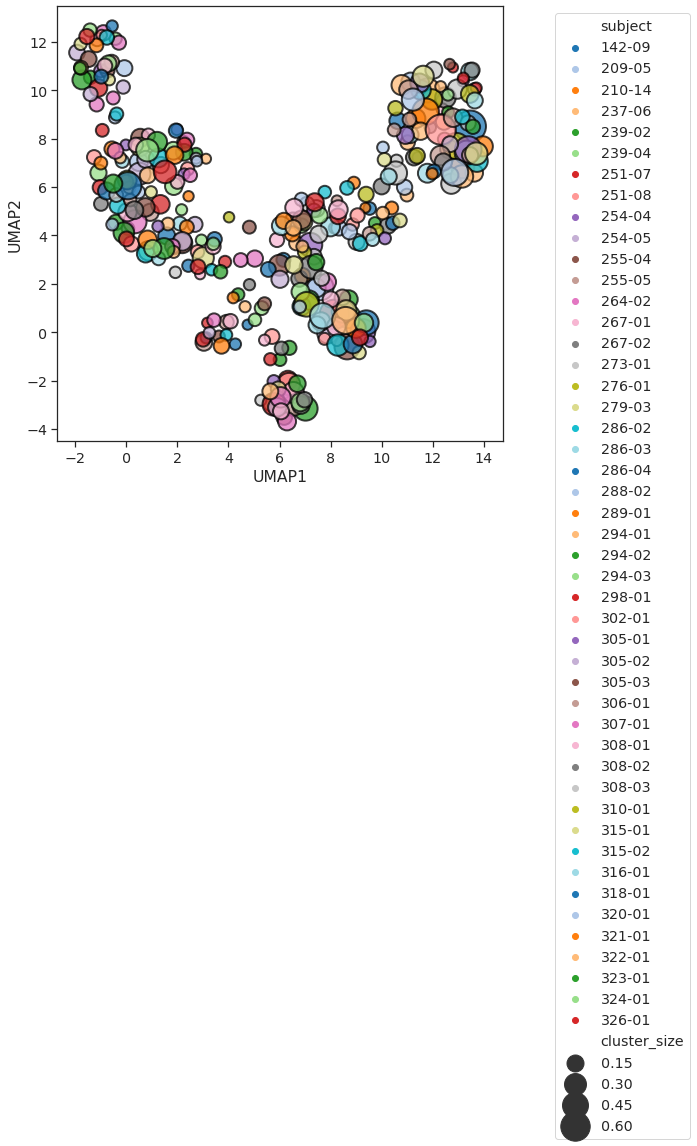

In [94]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100,
                                                    "min_dist": 1},
                              colour_label="subject")

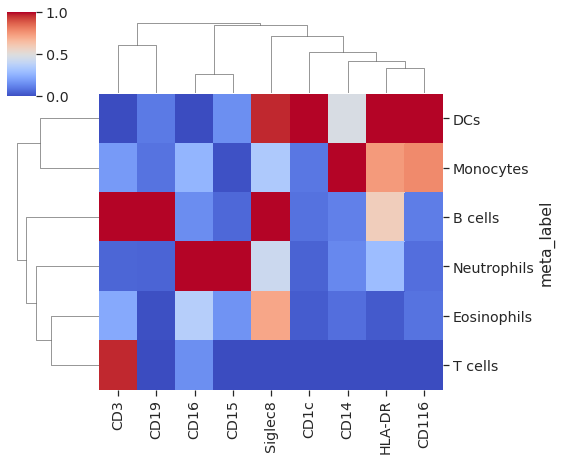

In [95]:
clustering.clustered_heatmap(features=['CD14', 'CD16', 'Siglec8', 'CD3',
                                       'CD1c', 'CD15', 'HLA-DR', 'CD116',
                                       'CD19'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)
plt.savefig("figures/flowsom_leukocytes_heatmap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

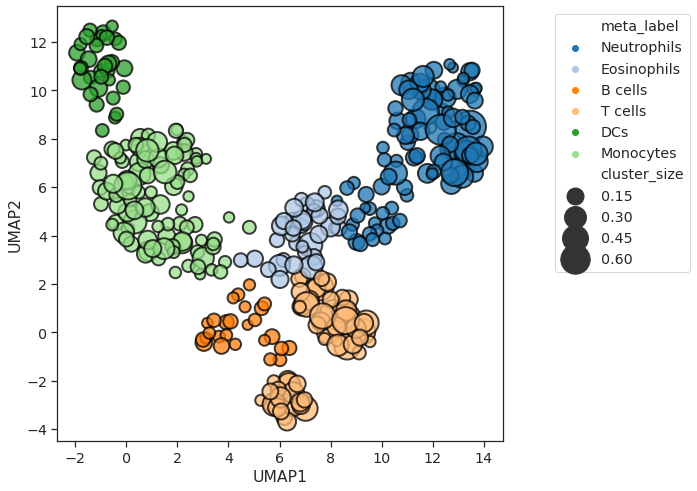

In [96]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})
plt.savefig("figures/flowsom_leukocytes_umap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

In [97]:
clustering.save()

  0%|          | 0/47 [00:00<?, ?it/s]

<h3>Peritonitis vs Stable</h3>

In [98]:
clustering.load_meta_variable(variable="status")

  0%|          | 0/47 [00:00<?, ?it/s]

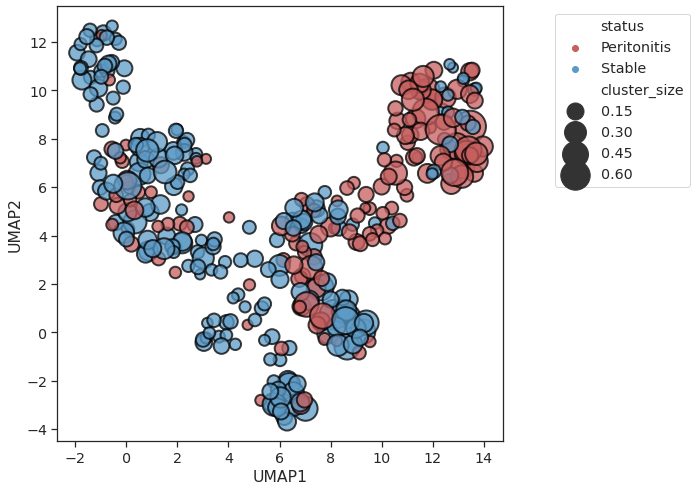

In [99]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100,
                                                    "min_dist": 1},
                              colour_label="status",
                              cmap=["#c75f5f", "#5d9bc7"])
plt.savefig("figures/flowsom_leukocytes_umap_status.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

<h2>Phenograph</h2>

In [100]:
features = exp.panel.list_markers()

In [101]:
from warnings import filterwarnings
filterwarnings("ignore")
clustering = Clustering(experiment=exp,
                        features=features,
                        sample_ids=[x for x in exp.list_samples() if x != "Training Data"],
                        root_population="root",
                        transform="logicle",
                        verbose=True,
                        population_prefix="Phenograph")

Loading single cell data...


  0%|          | 0/47 [00:00<?, ?it/s]

Ready to cluster!


<h3>Clustering</h3>

In [102]:
clustering.cluster(phenograph_clustering,
                   print_performance_metrics=False)

----- Clustering Corrected_142-09 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 5.66298246383667 seconds
Jaccard graph constructed in 2.403301954269409 seconds
Wrote graph to binary file in 0.5229032039642334 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.861522
Louvain completed 21 runs in 50.39667892456055 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 59.19002032279968 seconds
-----------------------------


----- Clustering Corrected_209-05 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.0437161922454834 seconds
Jaccard graph constructed in 0.1911461353302002 seconds
Wrote graph to binary file in 0.024022817611694336 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.845264
After 6 runs, maximum modularity is Q = 0.847213
Louvain completed 26 runs in 1.03192782402

Jaccard graph constructed in 2.833812713623047 seconds
Wrote graph to binary file in 0.5664091110229492 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.8696
After 2 runs, maximum modularity is Q = 0.870703
After 9 runs, maximum modularity is Q = 0.872756
Louvain completed 29 runs in 55.546684980392456 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 61.50948190689087 seconds
-----------------------------


----- Clustering Corrected_267-02 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.287524461746216 seconds
Jaccard graph constructed in 3.2158632278442383 seconds
Wrote graph to binary file in 0.5622403621673584 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.874621
After 8 runs, maximum modularity is Q = 0.875718
Louvain completed 28 runs in 63.292640924453735 seconds
Sorting communities by size, please wait ...
PhenoGr

Louvain completed 34 runs in 50.3918342590332 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 58.52958655357361 seconds
-----------------------------


----- Clustering Corrected_302-01 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 5.336655616760254 seconds
Jaccard graph constructed in 2.920520067214966 seconds
Wrote graph to binary file in 0.5405852794647217 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.85278
After 4 runs, maximum modularity is Q = 0.855829
After 24 runs, maximum modularity is Q = 0.857986
Louvain completed 44 runs in 107.60054206848145 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 116.6424195766449 seconds
-----------------------------


----- Clustering Corrected_305-01 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 7.756771802902222 seconds
Jaccard graph c

Jaccard graph constructed in 2.573425054550171 seconds
Wrote graph to binary file in 0.5507755279541016 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.848644
After 2 runs, maximum modularity is Q = 0.850706
After 6 runs, maximum modularity is Q = 0.853012
After 9 runs, maximum modularity is Q = 0.854128
Louvain completed 29 runs in 58.21056318283081 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 66.99549412727356 seconds
-----------------------------


----- Clustering Corrected_320-01 -----
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 5.673533916473389 seconds
Jaccard graph constructed in 2.9447524547576904 seconds
Wrote graph to binary file in 0.5370149612426758 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.832239
Louvain completed 21 runs in 48.94268846511841 seconds
Sorting communities by size, please wait ...
PhenoGr

<h3>Meta-clustering</h3>

In [117]:
clustering.meta_cluster(phenograph_metaclustering,
                        summary_method="median",
                        k=30)

----- Phenograph meta-clustering ------
...summarising clusters
...clustering the clusters
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.01925516128540039 seconds
Jaccard graph constructed in 0.17614245414733887 seconds
Wrote graph to binary file in 0.01438283920288086 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.887587
Louvain completed 21 runs in 0.7906882762908936 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1.1343982219696045 seconds
Clustering performance...
Silhouette coefficient: 0.26483758870331375
Calinski-Harabasz index: 177.37562575252696
Davies-Bouldin index: 1.2003176591487312
...assigning meta-labels
------ Complete ------


<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

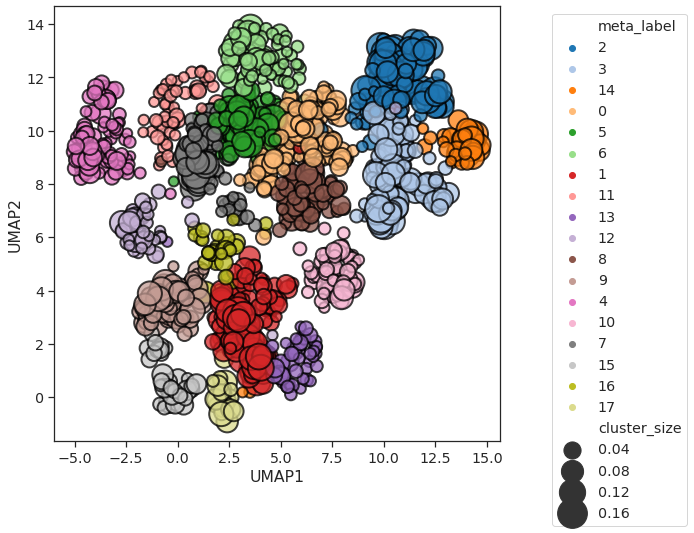

In [118]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})

In [119]:
clustering.data["subject"] = clustering.data["sample_id"].apply(lambda x: x.replace("Corrected_", ""))

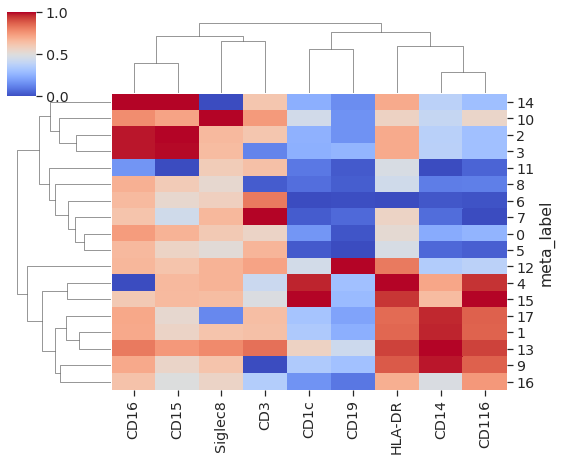

In [120]:
clustering.clustered_heatmap(features=['CD14', 'CD16', 'Siglec8', 'CD3',
                                       'CD1c', 'CD15', 'HLA-DR', 'CD116',
                                       'CD19'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [121]:
clustering.rename_meta_clusters({14:"Neutrophils",
                                 10:"Eosinophils",
                                 2: "Neutrophils",
                                 3: "Neutrophils",
                                 6: "T cells",
                                 7: "T cells",
                                 12:"B cells",
                                 4: "DCs",
                                 15:"DCs",
                                 17:"Monocytes",
                                 1: "Monocytes",
                                 13:"Monocytes",
                                 9: "Monocytes"})

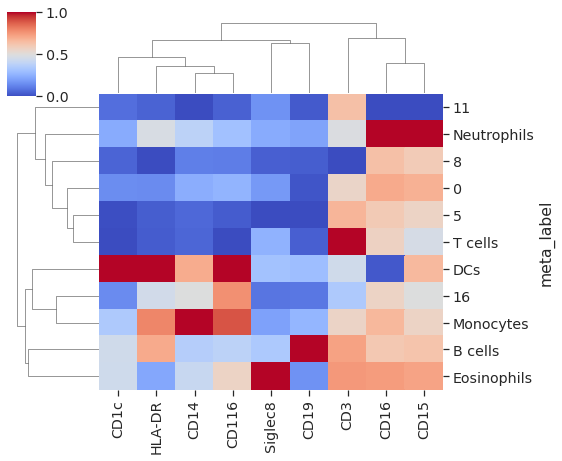

In [122]:
clustering.clustered_heatmap(features=['CD14', 'CD16', 'Siglec8', 'CD3',
                                       'CD1c', 'CD15', 'HLA-DR', 'CD116',
                                       'CD19'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [123]:
clustering.data = clustering.data[~clustering.data.meta_label.isin([11, 8, 0, 5, 16])]

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

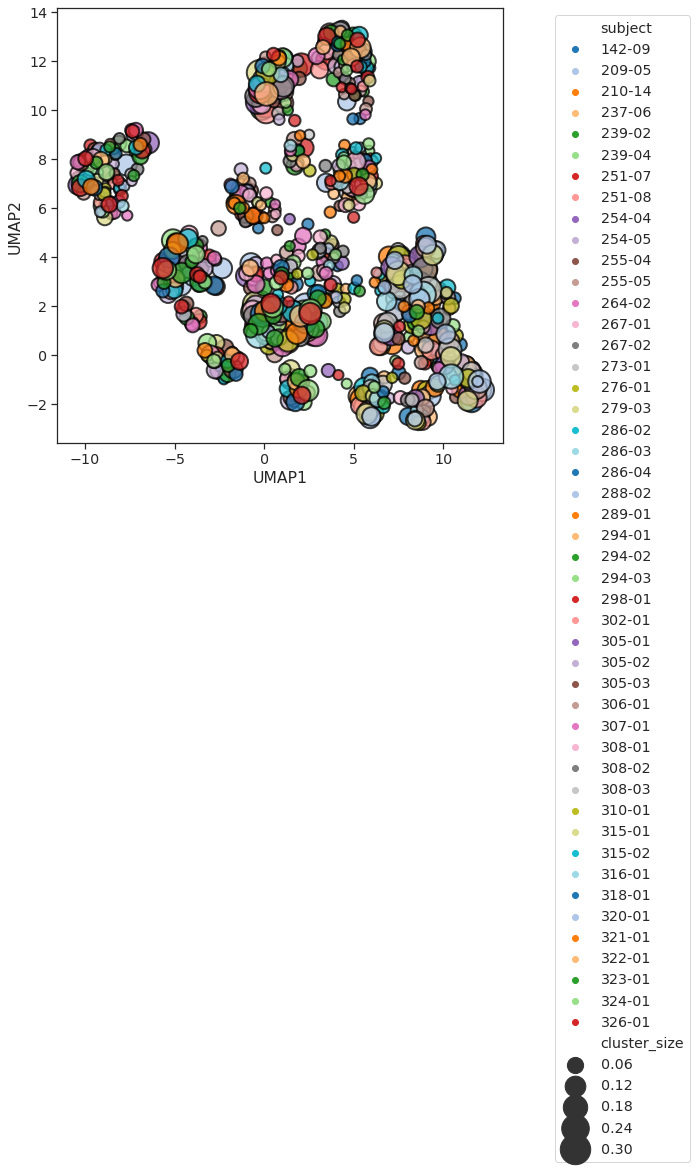

In [124]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1},
                              colour_label="subject")

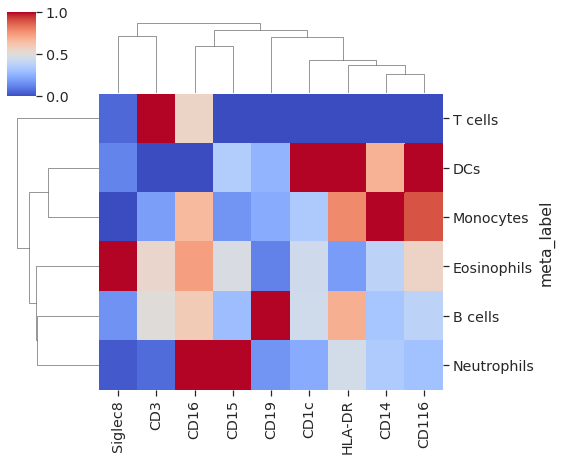

In [125]:
clustering.clustered_heatmap(features=['CD14', 'CD16', 'Siglec8', 'CD3',
                                       'CD1c', 'CD15', 'HLA-DR', 'CD116',
                                       'CD19'],
                             figsize=(8, 6.5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)
plt.savefig("figures/phenograph_leukocytes_heatmap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

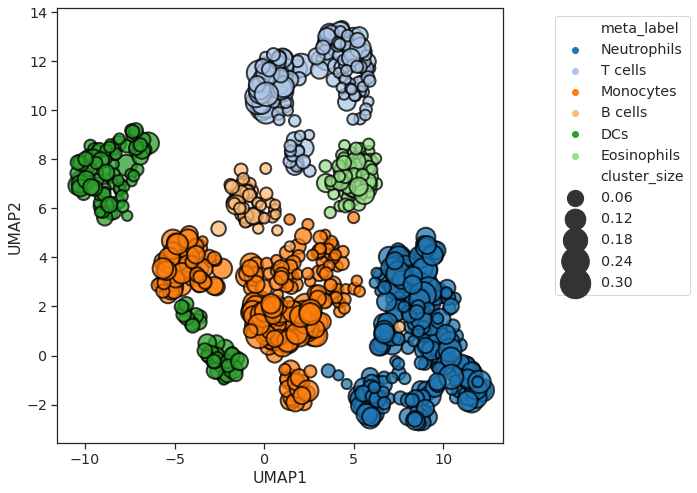

In [126]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100, "min_dist": 1})
plt.savefig("figures/phenograph_leukocytes_umap.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)

In [127]:
clustering.save()

  0%|          | 0/47 [00:00<?, ?it/s]

<h3>Peritonitis vs Stable</h3>

In [128]:
clustering.load_meta_variable(variable="status")

  0%|          | 0/47 [00:00<?, ?it/s]

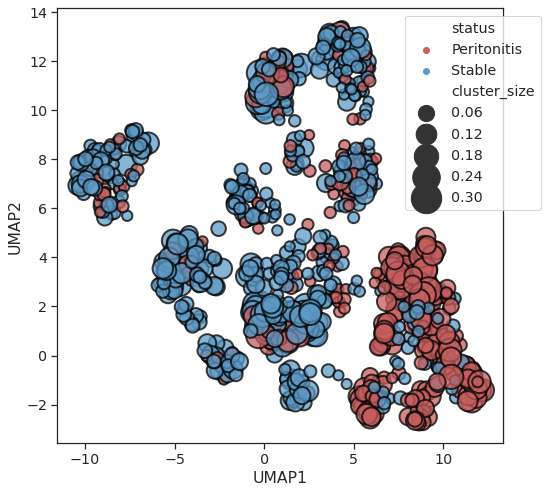

In [129]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 100,
                                                    "min_dist": 1},
                              colour_label="status",
                              cmap=["#c75f5f", "#5d9bc7"])
plt.savefig("figures/phenograph_leukocytes_umap_status.png",
            facecolor="white",
            bbox_inches="tight",
            dpi=300)